In [ ]:
# SET 4 – Hospital Patient AnalyticsScenario

# A hospital wants to analyze patient stay patterns and treatment costs.
# Problem Statement
# Create a dataset of at least 400 patients containing:
# patient_id, age, gender, diagnosis, hospital_days, treatment_cost

# Using Pandas:
# Compute average hospital stay per diagnosis.
# Segment patients into age groups.

# Using NumPy:
# Identify treatment cost anomalies.
# Apply suitable transformations to normalize cost data.

# Using a visualization library:
# Compare hospital stay across diagnoses.
# Visualize cost patterns across age groups.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import faker 


In [ ]:
# Generate data using faker
# patient_id, age, gender, diagnosis, hospital_days, treatment_cost

def fake_hospital_data():
    
    total_patients = 400
    fake = faker.Faker()
    with open('hospital_patients.csv', 'w') as f:
        f.write(f"patient_id,age,gender,diagnosis,hospital_days,treatment_cost\n")
        
        for i in range(total_patients):
            patient_id = i + 1
            age = fake.random_int(min=1, max=100)
            gender = fake.random_element(elements=('Male', 'Female'))
            diagnosis = fake.random_element(elements=('Flu', 'Fracture', 'Infection', 'Chronic Disease', 'Surgery'))
            hospital_days = fake.random_int(min=1, max=30)
            treatment_cost = fake.random_int(min=500, max=100000)
            f.write(f"{patient_id},{age},{gender},{diagnosis},{hospital_days},{treatment_cost:.2f}\n") 
             
fake_hospital_data()
    

In [ ]:
# read data from the file
hospital_df = pd.read_csv("hospital_patients.csv")

hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      400 non-null    int64  
 1   age             400 non-null    int64  
 2   gender          400 non-null    object 
 3   diagnosis       400 non-null    object 
 4   hospital_days   400 non-null    int64  
 5   treatment_cost  400 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 18.9+ KB


In [ ]:
# Check duplicates
hospital_df['patient_id'].unique().size

400

In [26]:
# Using Pandas:
# Compute average hospital stay per diagnosis.

diagnosis_avg_days = hospital_df.groupby('diagnosis')['hospital_days'].mean()
print("Average hospital stay per diagnosis")
print(diagnosis_avg_days)



Average hospital stay per diagnosis
diagnosis
Chronic Disease    15.700000
Flu                14.988372
Fracture           13.717949
Infection          14.511628
Surgery            14.585714
Name: hospital_days, dtype: float64


In [85]:
# Segment patients into age groups.

hospital_df['segment'] = hospital_df['age'].apply(lambda x: 'Child' if x < 18 else ('Adult' if x < 65 else 'Senior'))
hospital_df.head()

,patient_id,age,gender,diagnosis,hospital_days,treatment_cost,segment
0,1,59,Female,Fracture,13,26344.0,Adult
1,2,86,Male,Chronic Disease,29,65602.0,Senior
2,3,4,Female,Infection,29,800.0,Child
3,4,2,Female,Flu,5,57059.0,Child
4,5,92,Female,Chronic Disease,4,19302.0,Senior


In [88]:
# Using NumPy:
# Identify treatment cost anomalies.

costs = hospital_df['treatment_cost'].values

mean_cost = np.mean(costs)
std_cost = np.std(costs)
z_score = (costs - mean_cost) / std_cost

anomalies = costs[np.abs(z_score) > 2]

print("Anomalies in treatment costs:")
print(anomalies)


Anomalies in treatment costs:
[]


In [ ]:
# Apply suitable transformations to normalize cost data.

log_cost = np.log(costs)
print(f"Mean after log:", np.mean(log_cost))
print(f"Median after log:", np.median(log_cost))

Mean after log: 10.484521856467577
Median after log: 10.804217428489924


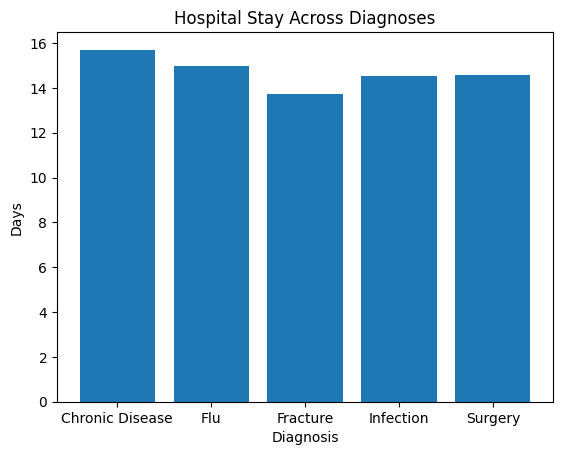

In [86]:
# Using a visualization library:
# Compare hospital stay across diagnoses.

diagnosis_avg_days = hospital_df.groupby('diagnosis')['hospital_days'].mean()
bars = plt.bar(diagnosis_avg_days.index, diagnosis_avg_days.values, alpha=1)

plt.title("Hospital Stay Across Diagnoses")
plt.xlabel("Diagnosis")
plt.ylabel("Days")

plt.show()


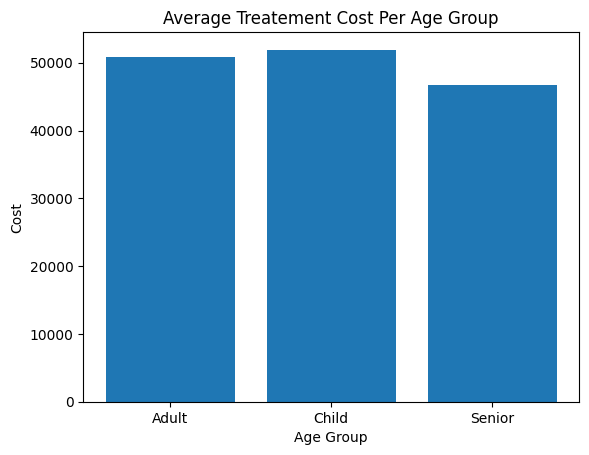

In [110]:
# Visualize cost patterns across age groups.

age_avg_cost = hospital_df.groupby('segment')['treatment_cost'].mean()

plt.bar(age_avg_cost.index, age_avg_cost.values)

plt.title("Average Treatement Cost Per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Cost")

plt.show()
